In [10]:
from timeit import default_timer as timer
import os,shutil
from SimEx import *
os.environ['PATH'] = '/opt/crystfel/bin/:'+os.environ['PATH'] 

In [11]:
print (os.environ['PATH'])

/opt/crystfel/bin/:/opt/crystfel/bin/:/home/juncheng/.conda/envs/simex/bin:/software/anaconda3/5.2/condabin:/software/anaconda3/5.2/bin:/opt/texlive/2019/bin/x86_64-linux:/sbin:/bin:/usr/sbin:/usr/bin


## Data path setting

In [12]:
data_path = '/gpfs/exfel/data/user/juncheng/crystalProject/data/simulation/'
out_path = "xstal/xstal_diffr_1"
# Remove previous results
shutil.rmtree(data_path+out_path,True)
os.chdir(data_path)
os.getcwd()

'/gpfs/exfel/data/user/juncheng/crystalProject/data/simulation'

## Configure photon beam properties

In [13]:
beamParam = PhotonBeamParameters(
    photon_energy = 4972.0 * electronvolt,  # photon energy in eV
    beam_diameter_fwhm=130e-9 * meter,      # focus diameter in m
    pulse_energy=100e-3 * joule,           # pulse energy in J
    photon_energy_relative_bandwidth=0.003, # relative bandwidth dE/E
    divergence=0.0 * radian,                # Beam divergence in rad
    photon_energy_spectrum_type='tophat',   # Spectrum type. Acceptable values are "tophat", "SASE", and "twocolor")
    )

## Configure detector geometry

In [14]:
panel = DetectorPanel(ranges={"fast_scan_min" : 0, "fast_scan_max" : 999,
                              "slow_scan_min" : 0, "slow_scan_max" : 999},
                      pixel_size=220.0e-6*meter,
                      energy_response=1.0/electronvolt,
                      distance_from_interaction_plane=0.13*meter,
                      corners={"x" : -500, "y": -500},
                      saturation_adu=1.e6,
                      )
detector_geometry = DetectorGeometry(panels=panel)

## Set diffractor parameters and pass beam & detector parameters to diffractor

In [15]:
diffParam = CrystFELPhotonDiffractorParameters(
    sample='3WUL.pdb',                    # Looks up pdb file in cwd, if not found, queries from RCSB pdb mirror.
    uniform_rotation=True,                # Apply random rotation
    number_of_diffraction_patterns=1,   #
    powder=False,                         # Set to True to create a virtual powder diffraction pattern (unested)
    intensities_file=None,                # File that contains reflection intensities. If set to none, use uniform intensity distribution
    crystal_size_range=[1e-7,1e-7],       # Range ([min,max]) in units of metres of crystal size.
    poissonize=False,                     # Set to True to add Poisson noise.
    number_of_background_photons=0,       # Change number to add uniformly distributed background photons.
    suppress_fringes=False,               # Set to True to suppress side maxima between reflection peaks.
    beam_parameters=beamParam,                 # Beam parameters object from above
    detector_geometry=detector_geometry,      # External file that contains the detector geometry in CrystFEL notation.
    )

diffractor = CrystFELPhotonDiffractor(
    parameters=diffParam,
    output_path=out_path)

Checking presence of 3WUL.pdb. Will query from PDB if not found in $PWD.
Sample path is set to 3WUL.pdb.


## Launch simulation

In [16]:
diffractor.backengine()
diffractor.saveH5()

['pattern_sim', '-p3WUL.pdb', '--geometry=/tmp/tmpj2wfal6a.geom', '--output=/gpfs/exfel/data/user/juncheng/crystalProject/data/simulation/xstal/xstal_diffr_1/diffr_out_0000001.h5', '--number=1', '--random-orientation', '--really-random', '--photon-energy=4972.000000', '--beam-bandwidth=0.003000', '--nphotons=1.255332e+14', '--beam-radius=6.500000e-08', '--spectrum=tophat']


127

## Analysis

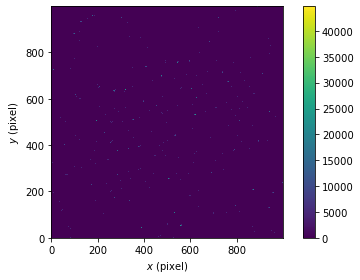

In [17]:
analysis = DiffractionAnalysis(diffractor.output_path)
analysis.plotPattern()